<a href="https://colab.research.google.com/github/PPM5658/AI_app/blob/main/Multi-object-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install ultralytics opencv-python-headless

Loading YOLOv8 model...
Model loaded successfully.
Image not found at path: test_image.jpg
Running object detection...
WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 38.9ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 35.3ms
Speed: 1.5ms preprocess, 37.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Detection complete.
Displaying results...


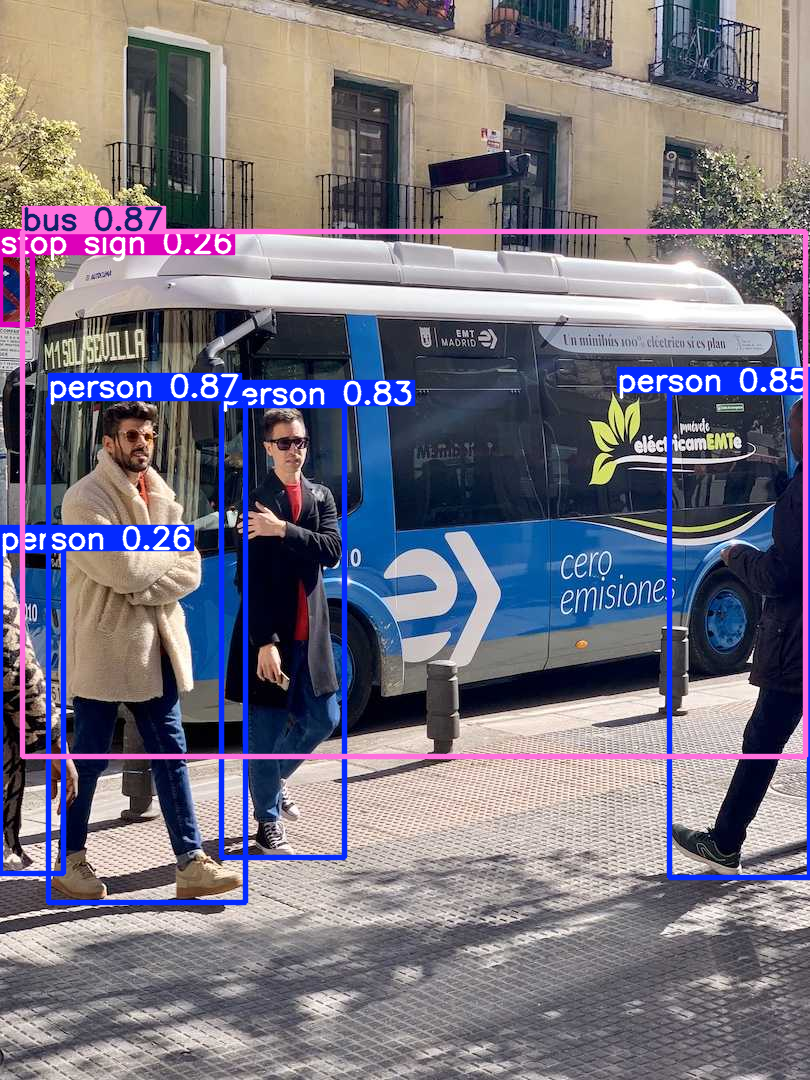

In [64]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow





print("Running object detection...")
results = model(frame)
print("Detection complete.")

# --- 4. Visualize the Results ---
# The 'results' object contains all the detections.
# The .plot() method is a handy way to draw the bounding boxes and labels on the image.
annotated_frame = results[0].plot()

print("Displaying results...")
cv2_imshow(annotated_frame)

In [65]:
print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')
print("Model loaded successfully.")

Loading YOLOv8 model...
Model loaded successfully.


In [67]:
image_path = '/content/drive/MyDrive/Object tracking/Gemini_Generated_Image_6ewnwr6ewnwr6ewn.png'
try:
    frame = cv2.imread(image_path)
    if frame is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    print("Image loaded successfully.")
except Exception as e:
    print(e)

Image loaded successfully.


In [72]:
print("Running object detection...")
results = model(frame,conf=0.5,imgsz=1440)
print("Detection complete.")

Running object detection...

0: 1440x1440 1 dog, 4 cups, 1 bowl, 5 potted plants, 1 tv, 1 laptop, 1 mouse, 1 keyboard, 1 book, 2 clocks, 122.8ms
Speed: 5.7ms preprocess, 122.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1440, 1440)
Detection complete.


Displaying results...


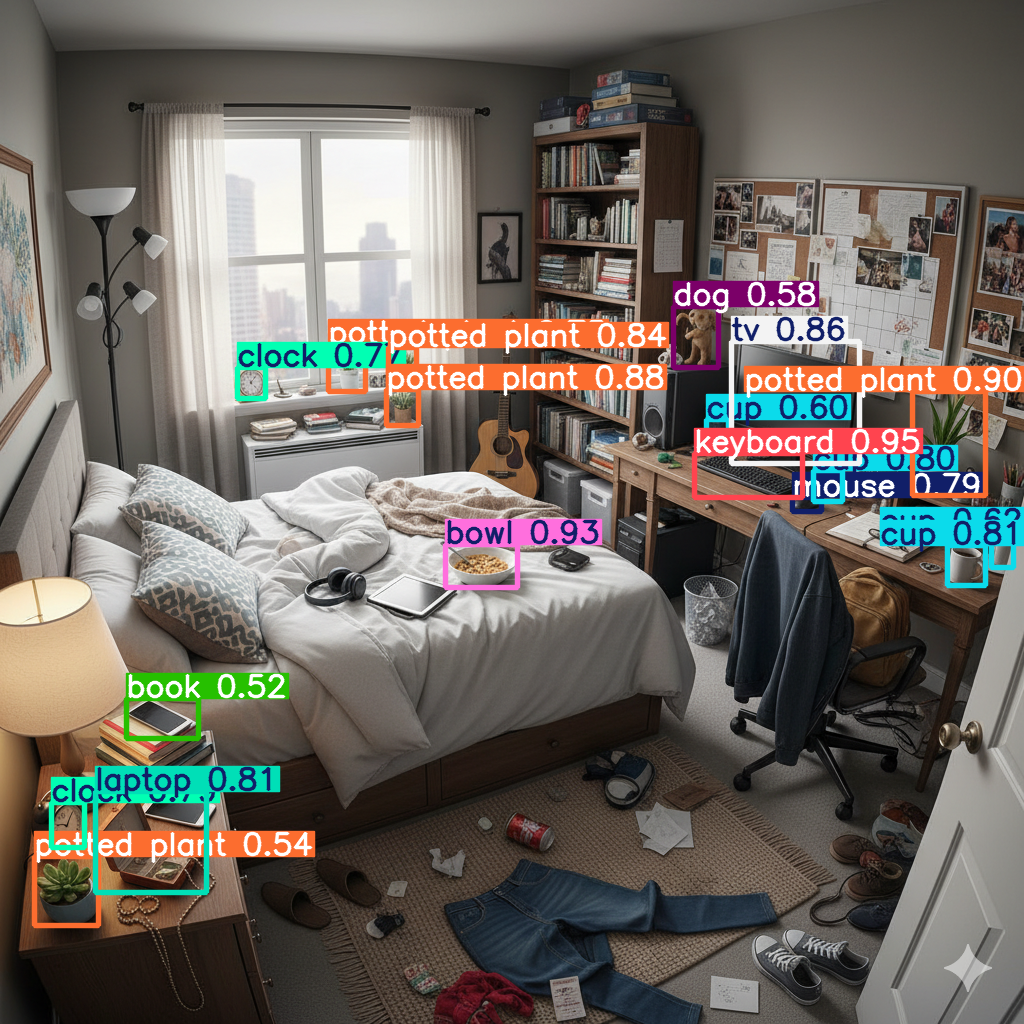

In [73]:
annotated_frame = results[0].plot()

print("Displaying results...")
cv2_imshow(annotated_frame)

In [76]:
class_names = results[0].names
print(f"Class names: {class_names}\n")

print(f"Found {len(results.boxes)} objects in the image.")

for box in results.boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords


    confidence = box.conf[0].cpu().numpy()

    class_id = int(box.cls[0].cpu().numpy())
    class_name = class_names[class_id]

    print(f"Object: {class_name} (ID: {class_id})")
    print(f"  - Confidence: {confidence:.2f}")
    print(f"  - Bounding Box: [x1:{x1}, y1:{y1}, x2:{x2}, y2:{y2}]")
    print("---")

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"{class_name} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2_imshow(frame)

Class names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone'

AttributeError: 'list' object has no attribute 'boxes'